In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Wstęp
Zbiór danych jest o pożarach w parku narodowym na północy Portugali.

Wyrabianie odruchu head-owania danch.

In [2]:
df = pd.read_csv("https://lovespreadsheet-tutorials.s3.amazonaws.com/APIDatasets/forest_fires_dataset.csv")
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32.0,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71.0,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70.0,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42.0,4.0,0.0,0.00


Warto też poczytać o atrybutach: 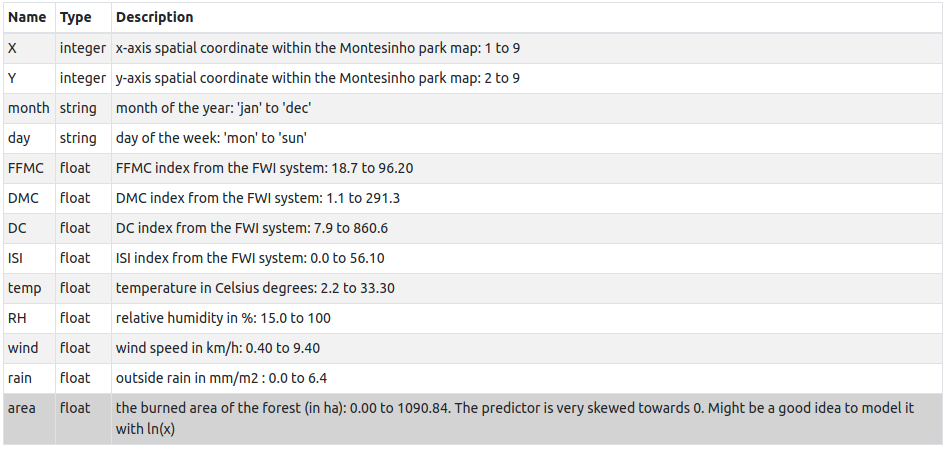

Warto zwrócić uwagę na wartości FFMC, DMC, DC i ISI, które są różnymi indeksami w systemie przewidywania pożarów leśnych.

Dane są teorytycznie bardzo ładne, nie ma nulli, ani zbyt dużo obiektów.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    float64
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 52.6+ KB


In [ ]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Martwiące są bardzo małe mediany zmiennych "rain" i "area"

# Dystrybucje zmiennych ciągłych
Na początek warto sprawdzić dystrybucje zmiennych liczbowych (bez X i Y, które nie mają sensu w tym kontekście, bo reprezentują miejsca w parku)

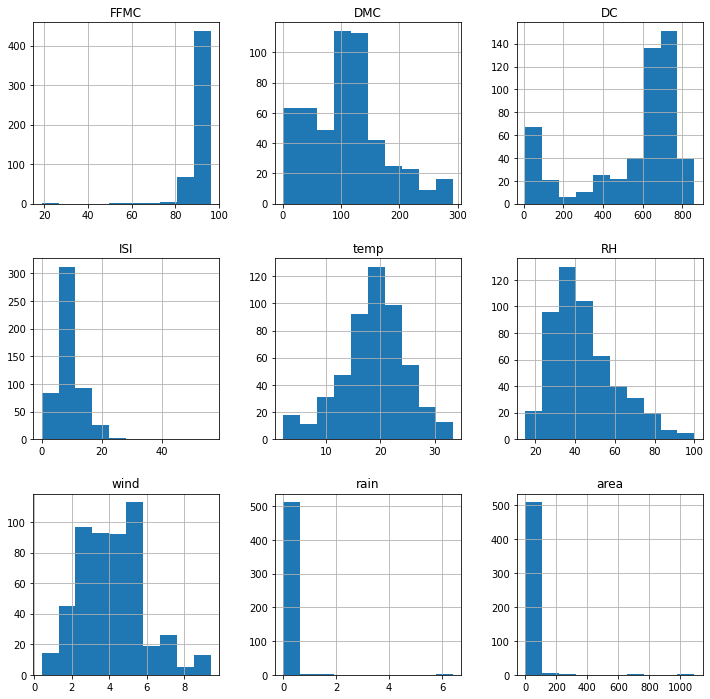

In [ ]:
no_xy = df.loc[:, (df.columns != "X") & (df.columns != "Y")]
no_xy.hist(figsize=(12, 12))
plt.show()

Wyglądają dobrze z wyjątkiem kilku. Brzydko wyglądają histogramy FFMC, ISI, rain i area. Być może jest to spowodowane odstającymi wartościami, więc naturalnym następnym krokiem jest usunięcie tych odstających danych.

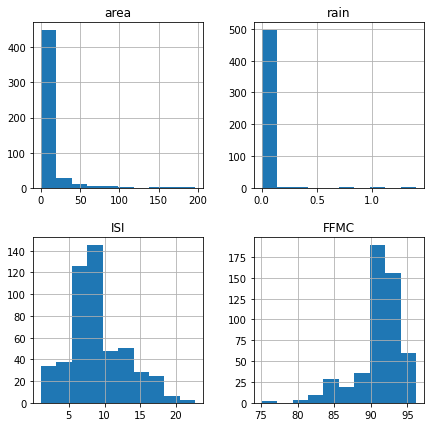

In [ ]:
def find_unusual(df):
  return (df["rain"] > 2) | (df["area"] > 200) | (df["ISI"] > 30) | (df["FFMC"] < 70)
filtered = df[~find_unusual(df)]
filtered = filtered[["area","rain", "ISI", "FFMC"]]
filtered.hist(figsize=(7, 7))
plt.show()

Usunięcie odstających wartości pomogło z czytelnością histogramów "ISI" oraz "FFMC", ale nie pomogło z "area", ani z "rain". Jest to spowodowane dużą liczbą zer w danych:

In [ ]:
a = len(df[df['area'] == 0.0])
r = len(df[df['rain'] == 0.0])
print(f"Row count where area is 0: {a}, this is {100*a/len(df):.2f}% of all rows")
print(f"Row count where rain is 0: {r}, this is {100*r/len(df):.2f}% of all rows")

Row count where area is 0: 247, this is 47.78% of all rows
Row count where rain is 0: 509, this is 98.45% of all rows


Prawie wszystkie wiersze mają wartość zerową w polu "rain", to pole może być mało użyteczne do modelowania. 

Pole "area" ma podobny problem, ale jest również celem zbioru danych, więc raczej nie można go po prostu usunąć.

# Daty
Zostały dwie dane kategoryczne do zbadania - dni tygodnia i miesiące:

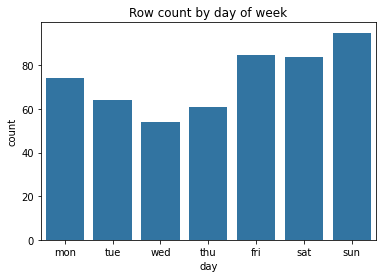

In [ ]:
dow = df.groupby(["day"]).agg(
    sum=("area", "sum"),
    count=("area", "count")
).reset_index()
weekdays = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
dow = dow.set_index("day").loc[weekdays].reset_index()
sns.barplot(data=dow, x="day", y="count", color="#1f77b4")
plt.title("Row count by day of week")
plt.show()


Widać większą liczbę wierszy w weekendy. Jeżeli każdy wiersz to jest zarejestrowany pożar, to można wyciągnąć wniosek, że ludzie wybierający się do parku w weekendy zgłaszają pożary (i/lub je powodują).

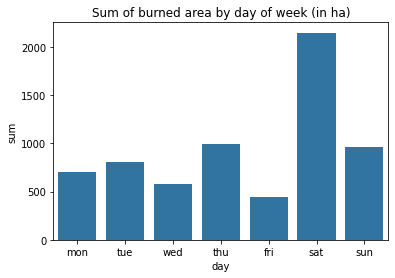

In [ ]:
sns.barplot(data=dow, x="day", y="sum", color="#1f77b4")
plt.title("Sum of burned area by day of week (in ha)")
plt.show()

Jednak agregując obszar spalonego lasu otrzymujemy trochę inną informację, która bardziej ujawnia specyfikę tego zbioru danych - atrybut "area" jest bardzo przechylony w kierunku zera, z kilkoma (bardzo) odstającymi wartościami. Te odstające wartości też są ważne, ponieważ chcielibyśmy przewidzieć pożar który spalił tysiąc hektarów lasu zamiast pięciu które nie spaliły nawet jednego. 

Ta specyfika danych powoduje, że miary tendencji centralnej nie są bardzo przydatne.

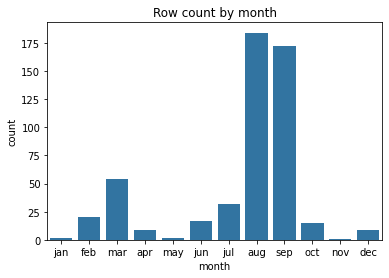

In [ ]:
bymonth = df.groupby(["month"]).agg(
    sum=("area", "sum"),
    count=("area", "count")
).reset_index()
months = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
bymonth = bymonth.set_index("month").loc[months].reset_index()
sns.barplot(data=bymonth, x="month", y="count", color="#1f77b4")
plt.title("Row count by month")
plt.show()

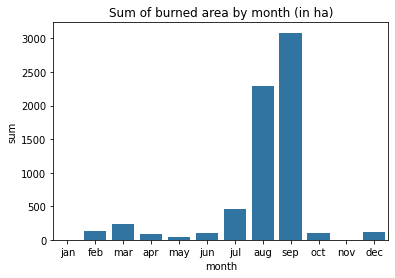

In [ ]:
sns.barplot(data=bymonth, x="month", y="sum", color="#1f77b4")
plt.title("Sum of burned area by month (in ha)")
plt.show()

W przypadku podziału na miesiące sytuacja wygląda lepiej i dokładnie widać miesiące, w których las jest suchy i podatny na pożary. 

Być może warto przetworzyć te zmienne kategoryczne na zmienne liczbowe.

# Korelacje


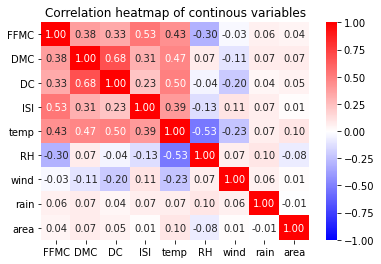

In [ ]:
heat = df.copy()
heat = heat.loc[:, (df.columns != "X") & (df.columns != "Y")]
heat = heat.corr()
sns.heatmap(heat, vmin=1, vmax=-1, cmap="bwr", annot=True, fmt=".2f")
plt.title("Correlation heatmap of continous variables")
plt.show()

Mapa ciepła korelacji zmiennych potwierdza podejrzenia z wcześniejszej analizy - indeksy do przewidywania pożarów korelują między sobą (kwadrat w lewym górnym rogu) oraz zachodzi korelacja z temperaturą i odwrotna korelacja ze średnią prędkością wiatru i średnią wilgotnością powietrza. Natomiast średnia opadów i obszar spalonego lasu znacznie mniej wchodzą w interakcję z innymi zmiennymi.

Warto zobaczyć te korelacje na scatterplotach.

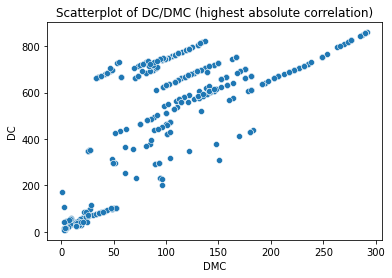

In [ ]:
sns.scatterplot(data=df, x="DMC", y="DC")
plt.title("Scatterplot of DC/DMC (highest absolute correlation)")
plt.show()

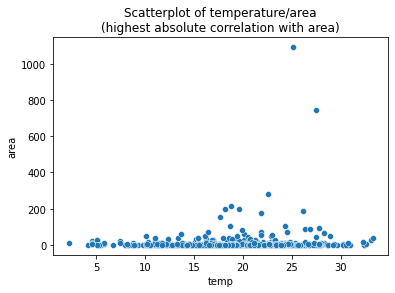

In [ ]:
sns.scatterplot(data=df, x="temp", y="area")
plt.title("Scatterplot of temperature/area\n(highest absolute correlation with area)")
plt.show()

Stosując zalecaną przez źródło danych transformację (logarytm ze zmiennej area) otrzymujemy trochę inną macierz, ale nie wiem czy lepszą.

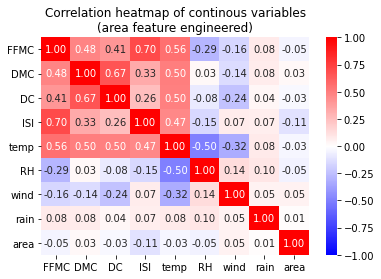

In [ ]:
heat_nonzero = df.copy()
heat_nonzero = heat_nonzero.loc[:, (df.columns != "X") & (df.columns != "Y")]
heat_nonzero = heat_nonzero[heat_nonzero["area"] != 0]
heat_nonzero["area"] = np.log(heat_nonzero["area"])
heat_nonzero_corr = heat_nonzero.corr()
sns.heatmap(heat_nonzero_corr, vmin=1, vmax=-1, cmap="bwr", annot=True, fmt=".2f")
plt.title("Correlation heatmap of continous variables\n(area feature engineered)")
plt.show()

Na wykresach punktowych jednak widać, że ten sposób inżynierii cech jest uzasadniony.

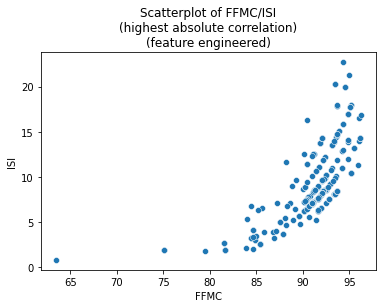

In [ ]:
sns.scatterplot(data=heat_nonzero, x="FFMC", y="ISI")
plt.title("Scatterplot of FFMC/ISI\n(highest absolute correlation)\n(feature engineered)")
plt.show()

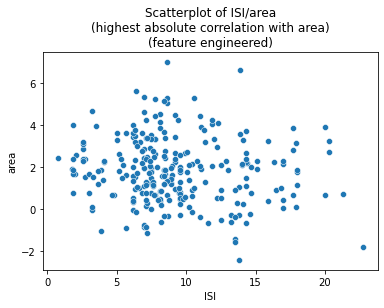

In [ ]:
sns.scatterplot(data=heat_nonzero, x="ISI", y="area")
plt.title("Scatterplot of ISI/area\n(highest absolute correlation with area)\n(feature engineered)")
plt.show()

# Pseudomapy

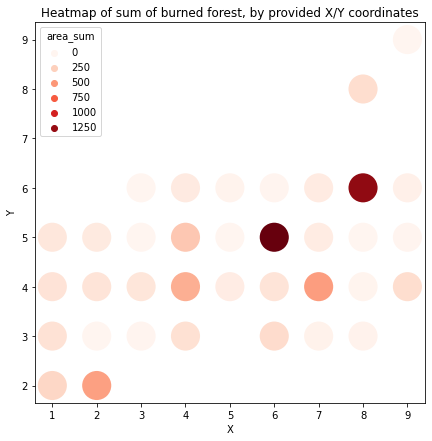

In [ ]:
point = df.copy()
point = point[["X", "Y", "area"]]
point = point.groupby(["X", "Y"]).agg(
    area_sum=("area", "sum"),
    count=("area", "count")
).reset_index()
plt.figure(figsize=(7, 7))
sns.scatterplot(data=point, x="X", y="Y", hue="area_sum", s=1000, legend="brief", palette="Reds")
plt.title("Heatmap of sum of burned forest, by provided X/Y coordinates")
plt.show()

Ostatnie parametry do których się nie dotknąłem to koordynaty X/Y. W źródle danych nie ma żadnej informacji co te koordynaty przedstawiają w rzeczywistości, więc można tylko zgadywać. Pomimo tego, można zauważyć, że niektóre z obszarów są znacznie bardziej dotknięte pożarami od innych, co można wykorzystać w modelu predykcyjnym.

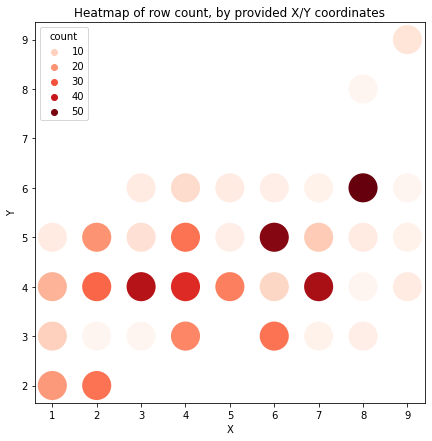

In [ ]:
plt.figure(figsize=(7, 7))
sns.scatterplot(data=point, x="X", y="Y", hue="count", s=1000, legend="brief", palette="Reds")
plt.title("Heatmap of row count, by provided X/Y coordinates")
plt.show()

Patrząc na mapę parku Montesinho to być może oś Y jest obrócona.
![mapa](https://www.montesinho.com/images/oparque/mapa.jpg)

# Automatyka
Pandas-profiling niestety nie działa na collaboratory (z czego rozumiem jest to jakiś problem z condą). Link do issue na repozytorium: https://github.com/pandas-profiling/pandas-profiling/issues/528

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandasy Profile Report")
profile.to_file("automat.html")

W automatycznie wygenerowanym raporcie nie znalazłem więcej ciekawych informacji na temat zioru danych, za wyjątkiem wykrycia kilku zduplikowanych wierszy (które być może nie były zduplikowane, tylko pojawiły się dwa pożary w tym samym obszarze tego samego dnia). Prawdopodobnie na większym zbiorze danych, lub bardziej zabałaganionym zbiorze to narzędzie byłoby bardziej użyteczne.